# Midterm 1

**Brian Roepke**
**DATA 110**

February 21, 2021

Perform a complete analysis on the dataset attached, including full EDA, data prep/cleansing, modeling/performance assessment and analysis annotation/description. Make sure to format your notebook accordingly with section headers and text, as part of your grade is based on the format of your notebook.

## Load the dataset and describe the data including the following:

* Peek at the data
* Statistical summary of all attributes
* Breakdown of the data by  variables

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, \
    classification_report, plot_confusion_matrix, confusion_matrix, \
    homogeneity_completeness_v_measure, homogeneity_score 
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, \
    GridSearchCV, KFold, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV, chi2, SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn import tree
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("bank.csv", delimiter=";")

In [31]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [32]:
df.shape

(4521, 17)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Numerical Data

In [34]:
# get numerical data only
numeric_data = df.select_dtypes(include=['int64'])
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       4521 non-null   int64
 1   balance   4521 non-null   int64
 2   day       4521 non-null   int64
 3   duration  4521 non-null   int64
 4   campaign  4521 non-null   int64
 5   pdays     4521 non-null   int64
 6   previous  4521 non-null   int64
dtypes: int64(7)
memory usage: 247.4 KB


### Categorical Data

In [35]:
# Change the ojbect type to a category type
df['job'] = df.job.astype('category')
df['marital'] = df.marital.astype('category')
df['education'] = df.education.astype('category')
df['default'] = df.default.astype('category')
df['housing'] = df.housing.astype('category')
df['loan'] = df.loan.astype('category')
df['contact'] = df.contact.astype('category')
df['month'] = df.month.astype('category')
df['poutcome'] = df.poutcome.astype('category')
df['y'] = df.y.astype('category')


# get categorical data
cat_data = df.select_dtypes(include=['category'])

cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   job        4521 non-null   category
 1   marital    4521 non-null   category
 2   education  4521 non-null   category
 3   default    4521 non-null   category
 4   housing    4521 non-null   category
 5   loan       4521 non-null   category
 6   contact    4521 non-null   category
 7   month      4521 non-null   category
 8   poutcome   4521 non-null   category
 9   y          4521 non-null   category
dtypes: category(10)
memory usage: 46.2 KB


In [36]:
# show counts values of each categorical variable
for colname in cat_data.columns:
    print (colname)
    print (cat_data[colname].value_counts(), '\n')

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64 

marital
married     2797
single      1196
divorced     528
Name: marital, dtype: int64 

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64 

default
no     4445
yes      76
Name: default, dtype: int64 

housing
yes    2559
no     1962
Name: housing, dtype: int64 

loan
no     3830
yes     691
Name: loan, dtype: int64 

contact
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64 

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64 

poutcome
unknown    3705
failure     490
other       197
success 

### Check for Null Values

In [37]:
# check for nan/null
df.isnull().values.any()

False

In [38]:
# count of nulls
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Note:** There are no duplicate values

### Remove Duplicates

In [39]:
# drop duplicates
len(df.drop_duplicates())

4521

In [40]:
df.shape

(4521, 17)

**Note:** There are no duplicate values

### Show Head and Tail

In [41]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [42]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


### Statistical Summary of all Attributes

Including a Breakdown of the data by the class variable.

In [43]:
df.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


In [44]:
cat_data.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


## B - Visualize the data including: 
Univariate and Multivariate plots

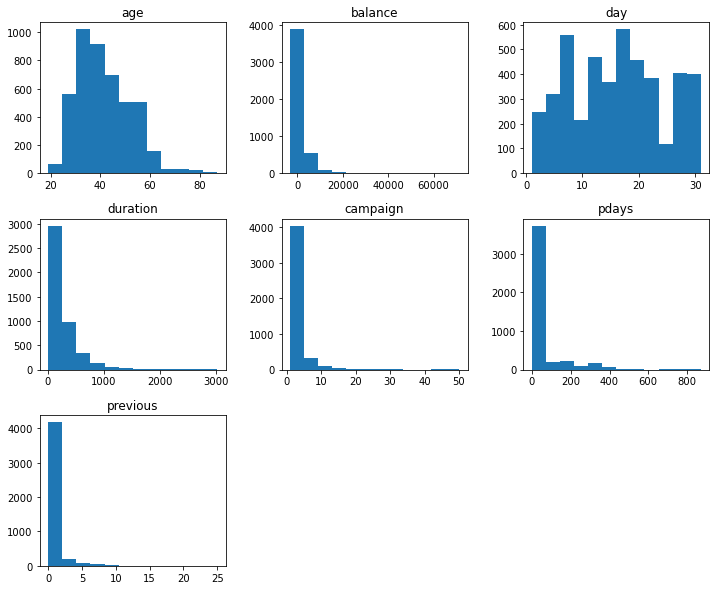

In [45]:
df.hist(figsize=(12,10), grid=False, bins=12, sharex=False);

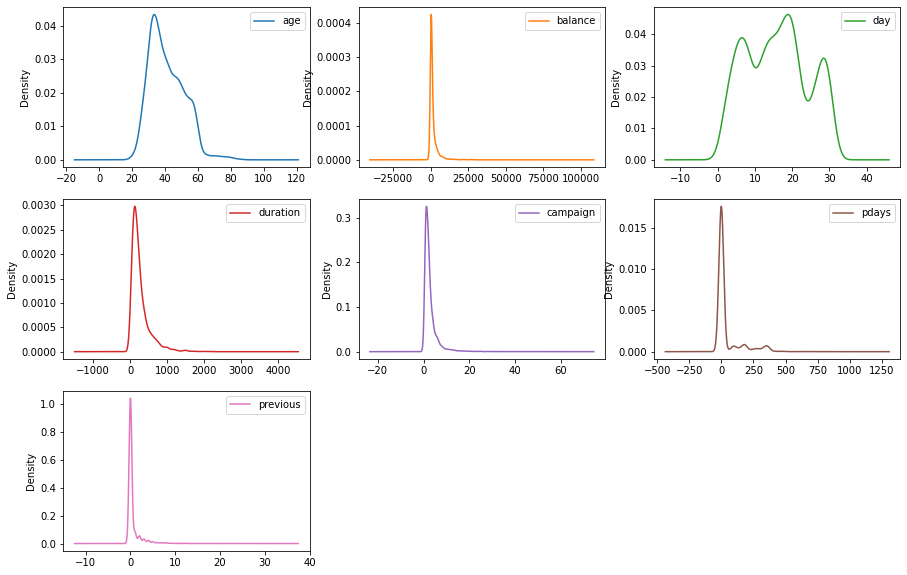

In [46]:
df.plot(figsize=(15,10), kind='density', subplots=True, layout=(3,3), sharex=False);

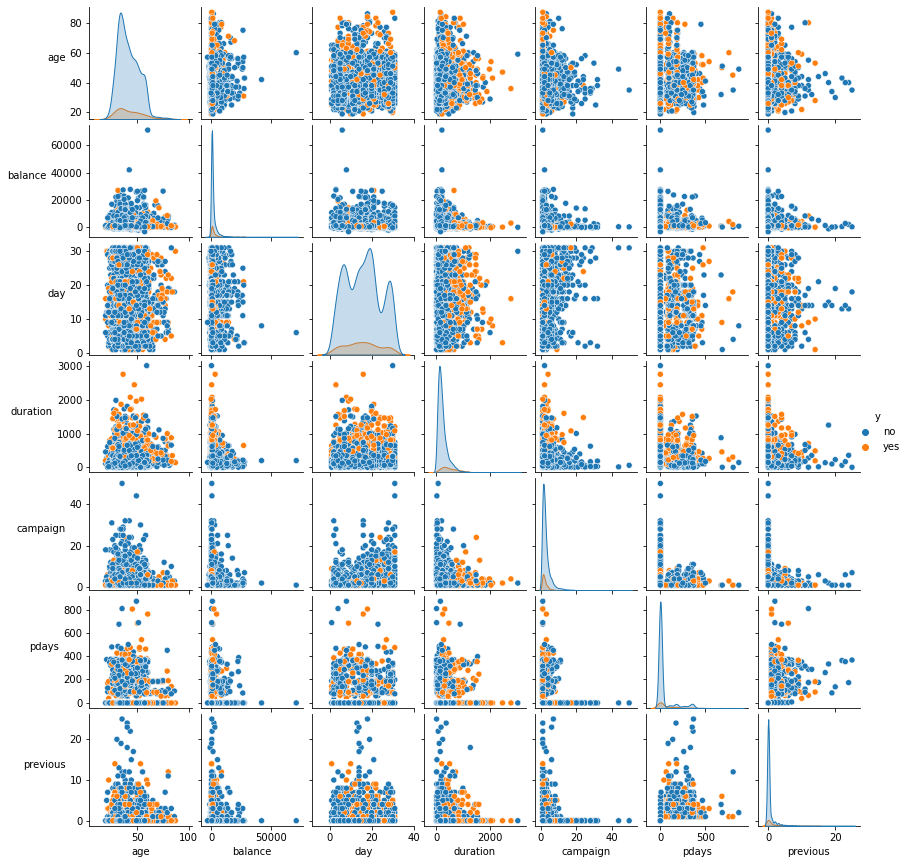

In [47]:
# Using seaborn, pairwise plot by income

g=sns.pairplot(df, diag_kind = 'auto', hue="y")
g.fig.set_size_inches(12,12);

# rotate labels
for ax in g.axes.flatten():
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

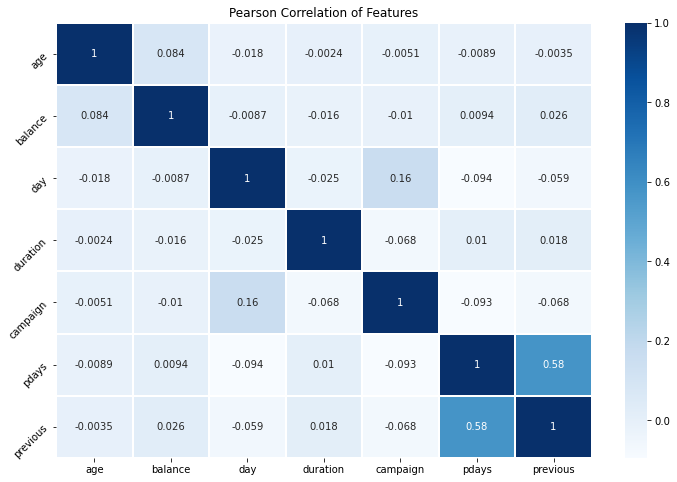

In [48]:
# using seaboarn to plot correlation heat map
corr = df.corr()

f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr, cmap="Blues", annot=True, square=False, ax=ax,  linewidth = 1)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=45);

## Create Prediction Model: 

Predict if the client will subscribe (yes/no) a term deposit (variable y)
Assess model performance

In [49]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [50]:
df.shape

(4521, 17)

### Variable Encoding

In [51]:
# Encode all categorical values as numeric
# None of the values appear to be ordinal, therefore we can do a simple encoding
enc = LabelEncoder()
df['job'] = enc.fit_transform(df['job'])
df['marital'] = enc.fit_transform(df['marital'])
df['education'] = enc.fit_transform(df['education'])
df['default'] = enc.fit_transform(df['default'])
df['housing'] = enc.fit_transform(df['housing'])
df['loan'] = enc.fit_transform(df['loan'])
df['contact'] = enc.fit_transform(df['contact'])
df['month'] = enc.fit_transform(df['month'])
df['poutcome'] = enc.fit_transform(df['poutcome'])
df['y'] = enc.fit_transform(df['y'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


In [53]:
# retrieve numpy array
dataset = df.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

In [54]:
X.shape

(4521, 16)

### Feature Selection
Based on the above performance, select the best model for feature evaluation.

>2 0.870 (0.009)
>3 0.882 (0.008)
>4 0.880 (0.009)
>5 0.890 (0.010)
>6 0.891 (0.009)
>7 0.891 (0.008)
>8 0.897 (0.009)
>9 0.894 (0.009)
>10 0.896 (0.008)
>11 0.896 (0.008)
>12 0.897 (0.008)
>13 0.898 (0.007)
>14 0.897 (0.008)
>15 0.896 (0.006)
>16 0.897 (0.008)


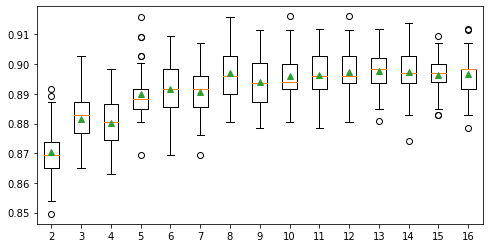

In [55]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 17):
        rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
        model = RandomForestClassifier(random_state=42)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.figure(figsize=(8,4))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [56]:
# Set the number of features based on above results
n_features = 8

In [57]:
# define RFE
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=n_features)

# fit RFE
rfe.fit(X, y)

features = []

# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True:
        features.append(i)

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 4.000
Column: 3, Selected False, Rank: 3.000
Column: 4, Selected False, Rank: 9.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 7.000
Column: 7, Selected False, Rank: 8.000
Column: 8, Selected False, Rank: 6.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 2.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 5.000
Column: 15, Selected True, Rank: 1.000


In [58]:
print(features)

[0, 1, 5, 9, 10, 11, 13, 15]


### Model Selection

In [62]:
# Copy the dataframe to a reduced set based on selected features
df_model = df.iloc[:,features].copy()

# Reduce the set of data, only to the model we'll train against.
dataset = df_model.values

# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

X.shape

(4521, 7)

* D-Tree 0.909 (0.011)
* RandForest 0.928 (0.006)
* GradBoost 0.929 (0.007)
* AdaBoost 0.892 (0.021)


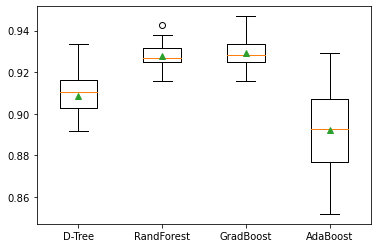

In [60]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # perceptron
    #rfe = RFE(estimator=Perceptron(), n_features_to_select=n_features)
    #model = Perceptron(random_state=42)
    #models['Perceptron'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=n_features)
    model = DecisionTreeClassifier(random_state=42)
    models['D-Tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=n_features)
    model = RandomForestClassifier(random_state=42)
    models['RandForest'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=n_features)
    model = GradientBoostingClassifier(random_state=42)
    models['GradBoost'] = Pipeline(steps=[('s',rfe),('m',model)])
    # adaboost
    rfe = RFE(estimator=AdaBoostClassifier(), n_features_to_select=n_features)
    model = AdaBoostClassifier(random_state=42)
    models['AdaBoost'] = Pipeline(steps=[('s',rfe),('m',model)])     
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('* %s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Model Training and Validation

In [75]:
# Split the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

In [76]:
print("Training Size:",len(X_train))
print("Test Size:",len(X_test))

Training Size: 3029
Test Size: 1492


In [77]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train);

In [78]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0      0.651     0.829     0.729       164
           1      0.350     0.209     0.262        67
           2      0.348     0.195     0.250        41
           3      1.000     1.000     1.000      1220

    accuracy                          0.924      1492
   macro avg      0.587     0.558     0.560      1492
weighted avg      0.914     0.924     0.916      1492



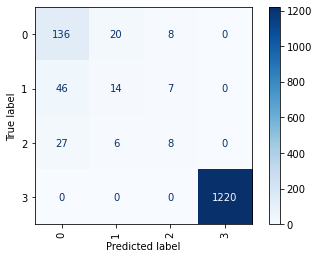

In [80]:
# print accuracy report
print(classification_report(y_test, y_pred, digits=3))

# show confusion matrix
plot_confusion_matrix(model, X_test, y_test,
                      xticks_rotation='vertical',
                      cmap=plt.cm.Blues)  
plt.show()